# **WK8 EDA Activity 2 - Exploratory Data Analysis**
<hr style=\"border:2.5px solid #126782\">
</hr>

Name: **Syron B. Viason** <br>
Course: **CPE2A**


# **Introduction:**

In today's rapidly evolving semiconductor industry, understanding market trends and technological advancements is crucial. This report presents an exploratory data analysis (EDA) of a dataset containing detailed specifications of various CPUs and GPUs, including process size, thermal design power (TDP), die size, transistor count, and operating frequency. Findings will be displayed at the end of the report and be presented through visualizations, and key recommendations will be provided to support informed decision-making in the field.
<hr style=\"border:2.5px solid #126782\">
</hr>

# *Data:*

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv(r".\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [48]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# **Chips Manufactured by Brand**


In [49]:
df_w = df.copy()

In [50]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [51]:
type(chip_count)

pandas.core.series.Series

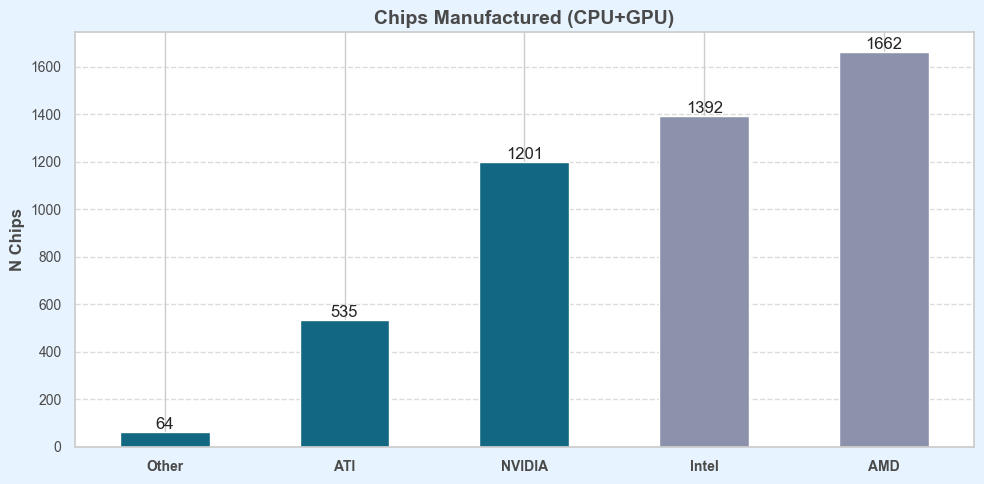

In [80]:
chip_count_sorted = chip_count.sort_values(ascending=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')  
chart = chip_count_sorted.plot(kind='bar',
                               color=['#126782' if i < 3 else '#8C92AC' for i in range(len(chip_count_sorted))]) 
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily='Arial',  
          fontsize=14,        
          fontweight='bold',  
          color='#4A4A4A')   

plt.xlabel('', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')  
plt.ylabel('N Chips', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')  

chart.set_xticklabels(chip_count_sorted.index, rotation=0, fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold') 
chart.tick_params(axis='y', labelsize=10, colors='#4A4A4A')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU Manufactured**



## GPU Manufactured

In [53]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [54]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

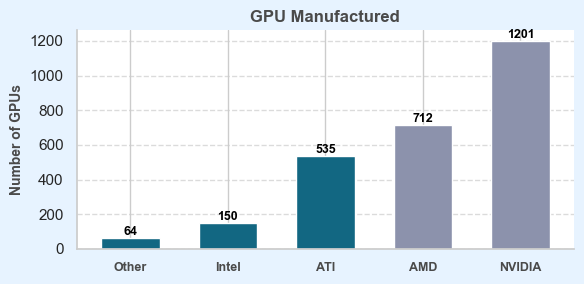

In [93]:
gpu_count_sorted = gpu_count.sort_values(ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 3), facecolor='#E7F3FF')

colors = ['#126782' if i < 3 else '#8C92AC' for i in range(len(gpu_count_sorted))]

chart = gpu_count_sorted.plot(kind='bar', color=colors, width=0.6)

chart.bar_label(chart.containers[0], label_type='edge', fontsize=9, color='black', weight='bold')

plt.title('GPU Manufactured',
          fontfamily='Arial',
          fontsize=12,
          fontweight='bold',
          color='#4A4A4A')

plt.xlabel('', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(rotation=0, fontsize=9, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('Number of GPUs', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

## CPU Manufactured

In [94]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [95]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

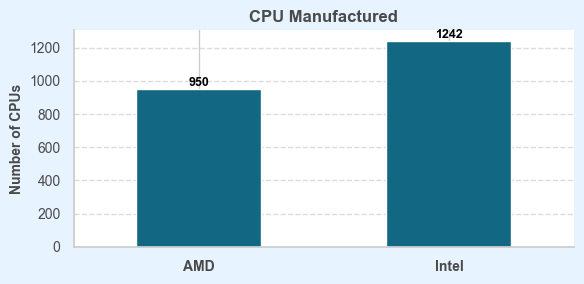

In [96]:
cpu_count_sorted = cpu_count.sort_values(ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 3), facecolor='#E7F3FF')
colors = ['#126782' if i < 3 else '#8C92AC' for i in range(len(cpu_count_sorted))]
chart = cpu_count_sorted.plot(kind='bar',
                              color=colors
                              )

chart.bar_label(chart.containers[0], label_type='edge', fontsize=9, color='black', weight='bold')

plt.title('CPU Manufactured',
          fontfamily='Arial',
          fontsize=12,
          fontweight='bold',
          color='#4A4A4A')

plt.xlabel('', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')  
plt.xticks(rotation=0, fontsize=9, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('Number of CPUs', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')  

chart.set_xticklabels(cpu_count_sorted.index, rotation=0, fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold') 
chart.tick_params(axis='y', labelsize=10, colors='#4A4A4A')  

plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU TDP (Thermal Design Power)**


In [151]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [152]:
type(df_tdp)

pandas.core.frame.DataFrame

In [153]:
df_tdphighest = df_tdp.copy()
df_tdplowest = df_tdp.sort_values(by='TDP')
df_tdplowest

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


## **GPU TDP**

#### **Lowest** GPU TDP

In [155]:
df_gpu_tdp = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]
df_tdphighestgpu = df_gpu_tdp.copy()
df_gpu_tdp = df_gpu_tdp.sort_values(by='TDP')
df_gpu_tdp = df_gpu_tdp.head(10)

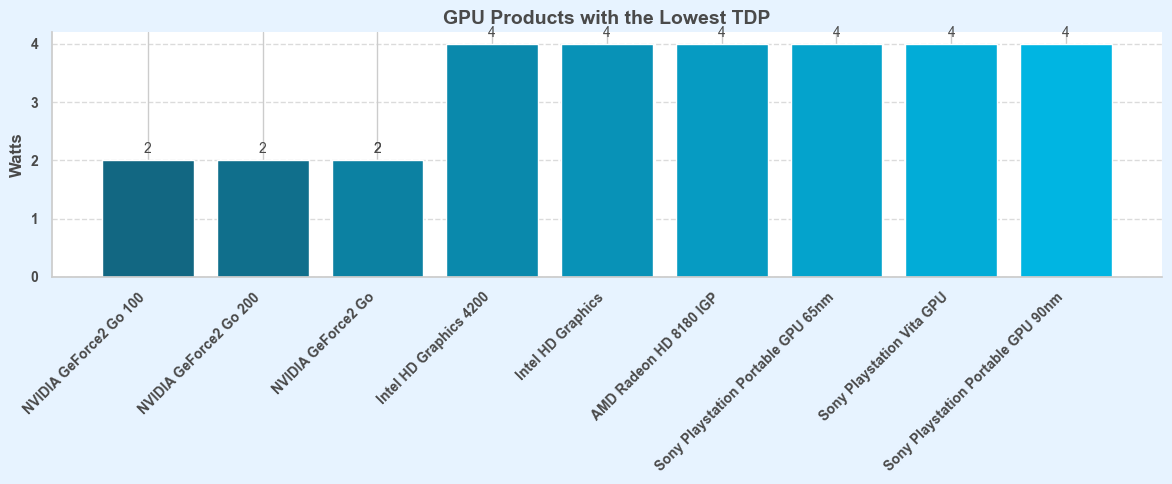

In [169]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), facecolor='#E7F3FF')

bars = plt.bar(df_gpu_tdp['Product'], df_gpu_tdp['TDP'],
               color=[f'#{int(r):02x}{int(g):02x}{int(b):02x}' for r, g, b in 
                      np.linspace((18, 103, 130), (0, 181, 226), len(df_gpu_tdp)).astype(int)])

plt.bar_label(bars, label_type='edge', padding=3, fontsize=10, color='#4A4A4A', fontfamily='Arial')

plt.title('GPU Products with the Lowest TDP', fontsize=14, fontweight='bold', color='#4A4A4A', fontfamily='Arial')
plt.ylabel('Watts', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### **Highest** GPU TDP

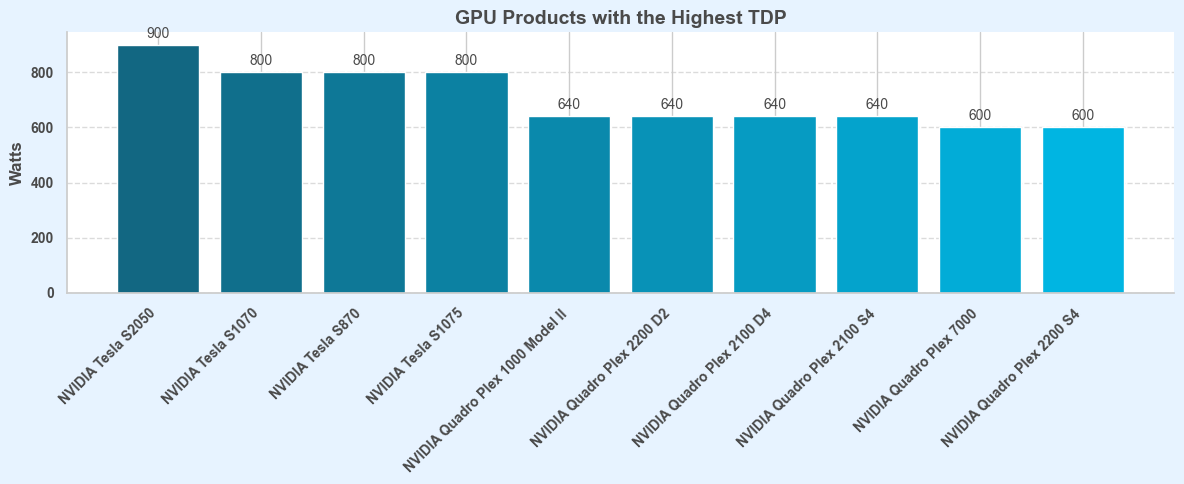

In [176]:

df_tdphighestgpu = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]
df_tdphighestgpu = df_tdphighestgpu.sort_values(by='TDP', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), facecolor='#E7F3FF')

bars = plt.bar(df_tdphighestgpu['Product'], df_tdphighestgpu['TDP'],
                color=[f'#{int(r):02x}{int(g):02x}{int(b):02x}' for r, g, b in 
                       np.linspace((18, 103, 130), (0, 181, 226), len(df_tdphighestgpu)).astype(int)])

plt.bar_label(bars, label_type='edge', padding=3, fontsize=10, color='#4A4A4A', fontfamily='Arial')

plt.title('GPU Products with the Highest TDP', fontsize=14, fontweight='bold', color='#4A4A4A', fontfamily='Arial')
plt.ylabel('Watts', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## **CPU TDP**

#### **Lowest** CPU TDP

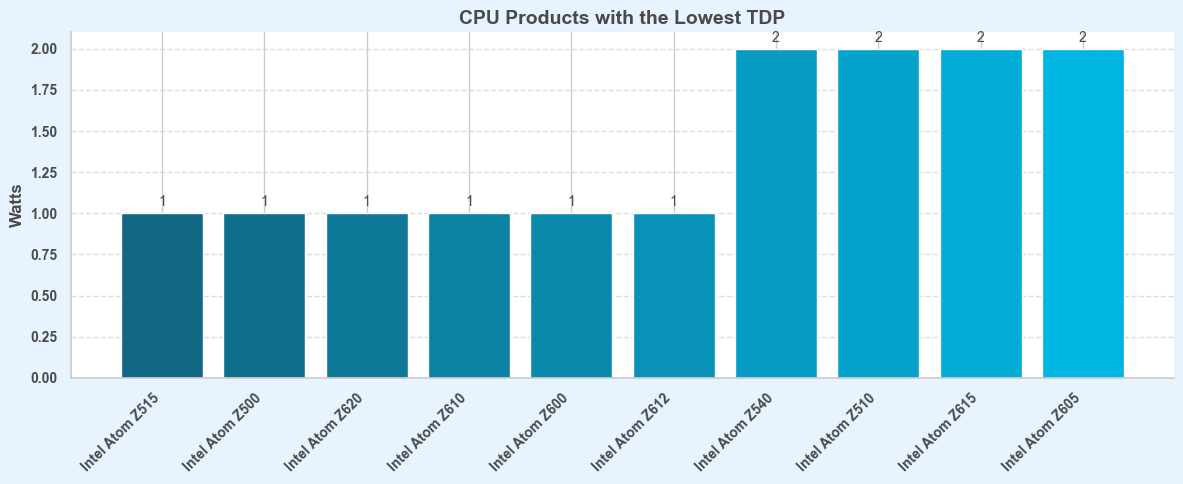

In [182]:

df_tdphlowestcpu = df_w[df_w['Type'] == 'CPU'][['Product', 'TDP']]
df_tdplowestcpu = df_tdphlowestcpu.sort_values(by='TDP').head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), facecolor='#E7F3FF')

bars = plt.bar(df_tdplowestcpu['Product'], df_tdplowestcpu['TDP'],
                color=[f'#{int(r):02x}{int(g):02x}{int(b):02x}' for r, g, b in 
                       np.linspace((18, 103, 130), (0, 181, 226), len(df_tdplowestcpu)).astype(int)])

plt.bar_label(bars, label_type='edge', padding=3, fontsize=10, color='#4A4A4A', fontfamily='Arial')

plt.title('CPU Products with the Lowest TDP', fontsize=14, fontweight='bold', color='#4A4A4A', fontfamily='Arial')
plt.ylabel('Watts', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### **Highest** CPU TDP

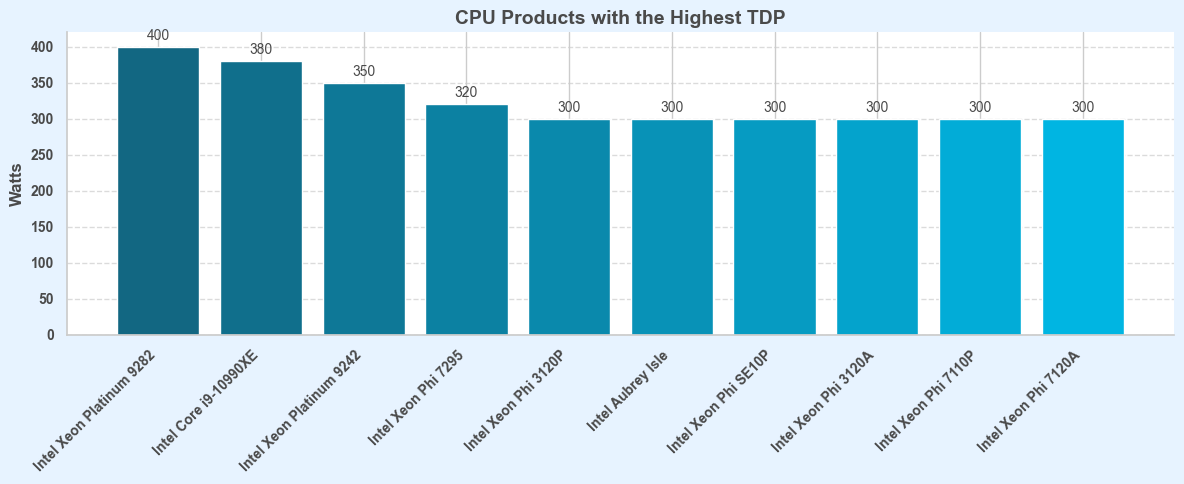

In [178]:
df_tdphighestcpu = df_w[df_w['Type'] == 'CPU'][['Product', 'TDP']]
df_tdphighestcpu = df_tdphighestcpu.sort_values(by='TDP', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), facecolor='#E7F3FF')

bars = plt.bar(df_tdphighestcpu['Product'], df_tdphighestcpu['TDP'],
                color=[f'#{int(r):02x}{int(g):02x}{int(b):02x}' for r, g, b in 
                       np.linspace((18, 103, 130), (0, 181, 226), len(df_tdphighestcpu)).astype(int)])

plt.bar_label(bars, label_type='edge', padding=3, fontsize=10, color='#4A4A4A', fontfamily='Arial')

plt.title('CPU Products with the Highest TDP', fontsize=14, fontweight='bold', color='#4A4A4A', fontfamily='Arial')
plt.ylabel('Watts', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU Process Size Trend**


## GPU Process Size

In [106]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [107]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [108]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


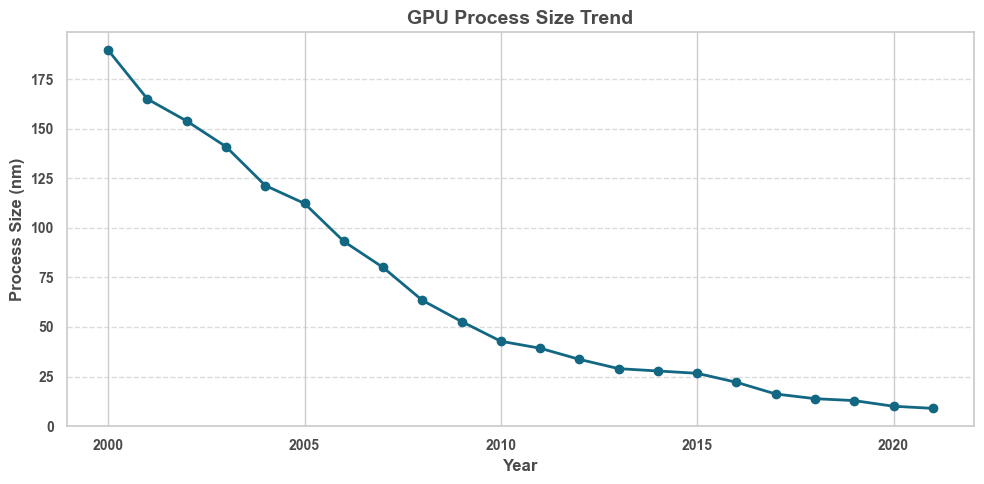

In [109]:
df_ps_sorted = df_ps.sort_values(by='Process_Size', ascending=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(df_ps_sorted['Year'], df_ps_sorted['Process_Size'], marker='o', color='#126782', linewidth=2, markersize=6)
plt.title('GPU Process Size Trend',
          fontfamily='Arial',
          fontsize=14,
          fontweight='bold',
          color='#4A4A4A')
plt.ylabel('Process Size (nm)',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')
plt.xlabel('Year',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')
plt.xticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## CPU Process Size

In [110]:
dfc_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
dfc_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [111]:
dfc_ps['Date'] = pd.to_datetime(dfc_ps['Date'])
dfc_ps['Year'] = dfc_ps['Date'].dt.year
dfc_ps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [112]:
dfc_ps = dfc_ps.groupby('Year')['Process_Size'].mean().reset_index()
dfc_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


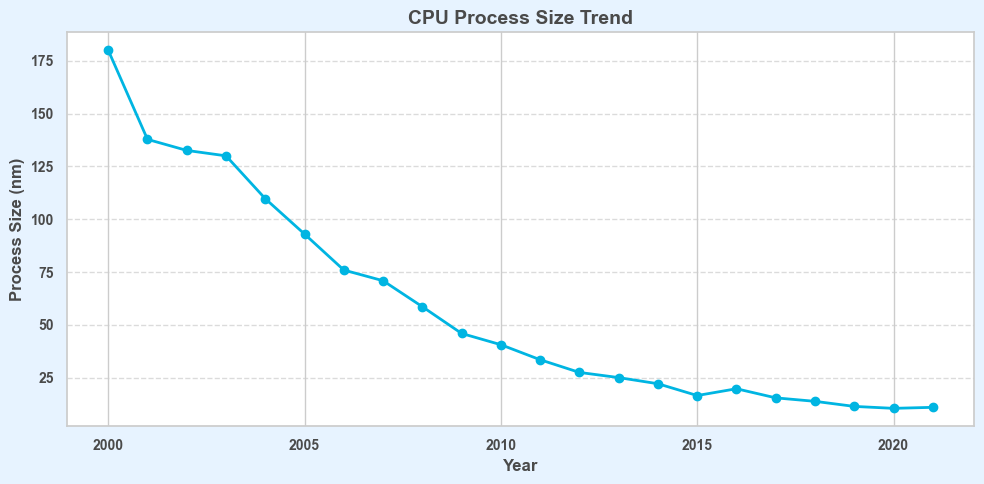

In [147]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')
plt.plot(dfc_ps['Year'], dfc_ps['Process_Size'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('CPU Process Size Trend',
          fontsize=14,
          fontweight='bold',
          color='#4A4A4A')

plt.ylabel('Process Size (nm)',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xlabel('Year',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

# Set x-ticks to multiples of 5
plt.xticks(range(int(min(dfc_ps['Year'])), int(max(dfc_ps['Year'])) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU Die Size Trend**


## GPU Die Size

In [114]:
df_ps = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [115]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [116]:
df_ps = df_ps.groupby('Year')['Die_Size'].mean().reset_index()
df_ps

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


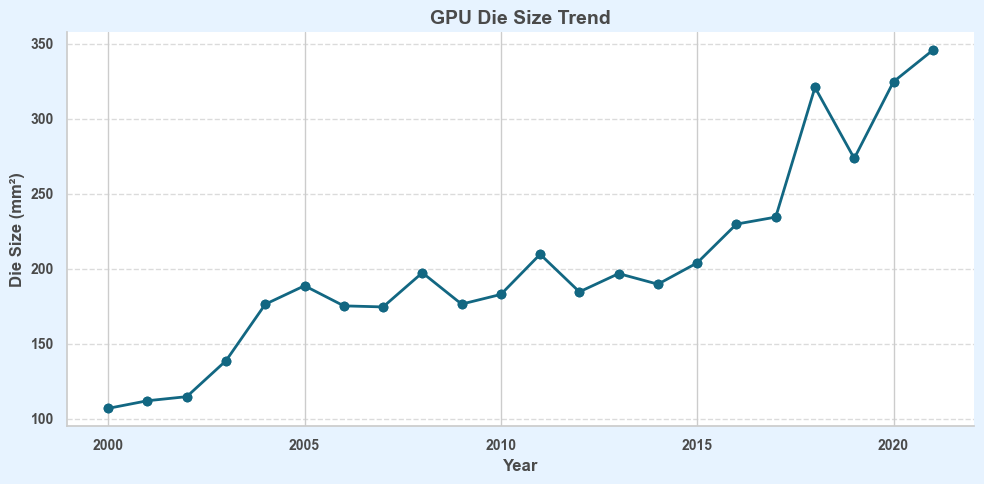

In [119]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Die_Size'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('GPU Die Size Trend', fontsize=14, fontweight='bold', color='#4A4A4A')

plt.ylabel('Die Size (mm²)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Die_Size'], color='#126782', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## CPU Die Size

In [143]:
df_ps = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [144]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [145]:
df_ps = df_ps.groupby('Year')['Die_Size'].mean().reset_index()
df_ps

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


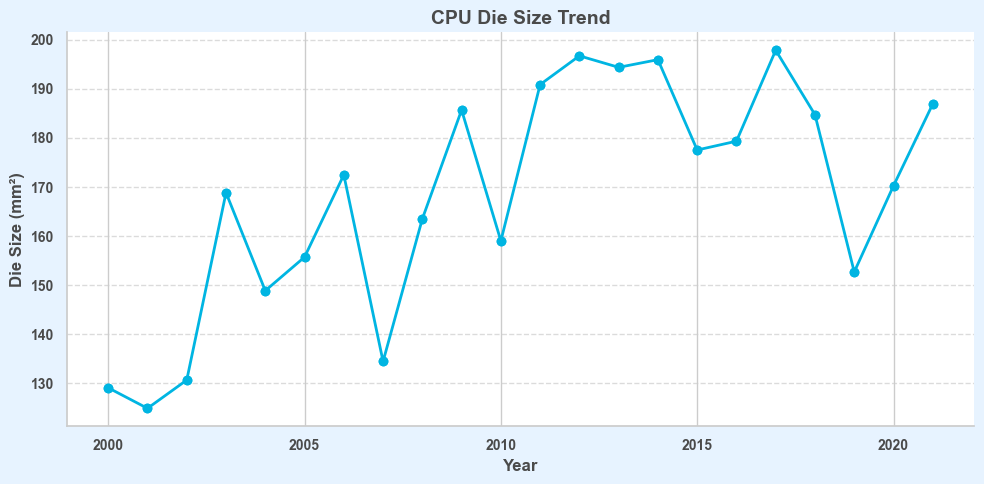

In [146]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Die_Size'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('CPU Die Size Trend',
          fontsize=14,
          fontweight='bold',
          color='#4A4A4A')

plt.ylabel('Die Size (mm²)',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xlabel('Year',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Die_Size'], color='#00B5E2', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU Transistors Trend**


## GPU Transistors

In [120]:
df_ps = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [121]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [122]:
df_ps = df_ps.groupby('Year')['Transistors'].mean().reset_index()
df_ps

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


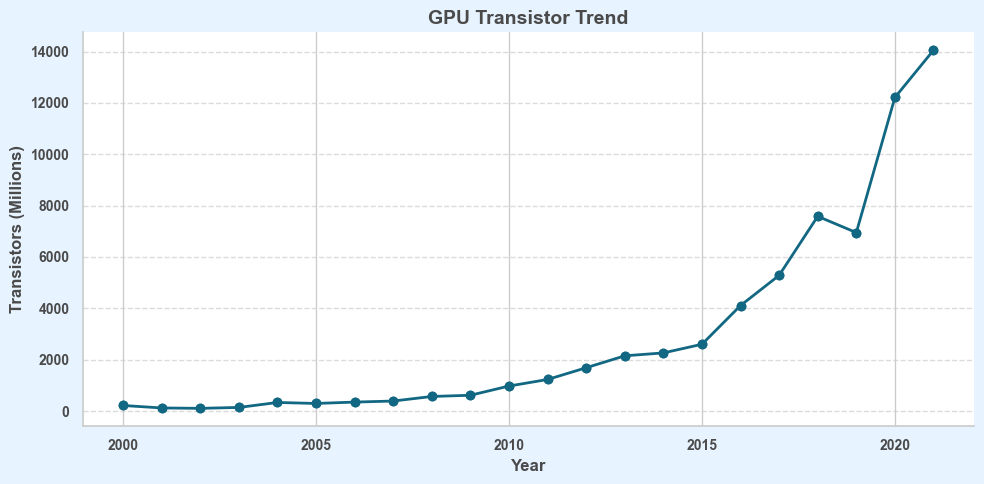

In [124]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Transistors'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('GPU Transistor Trend', fontsize=14, fontweight='bold', color='#4A4A4A')

plt.ylabel('Transistors (Millions)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Transistors'], color='#126782', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## CPU Transistors

In [138]:
df_ps = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [139]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [140]:
df_ps = df_ps.groupby('Year')['Transistors'].mean().reset_index()
df_ps

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


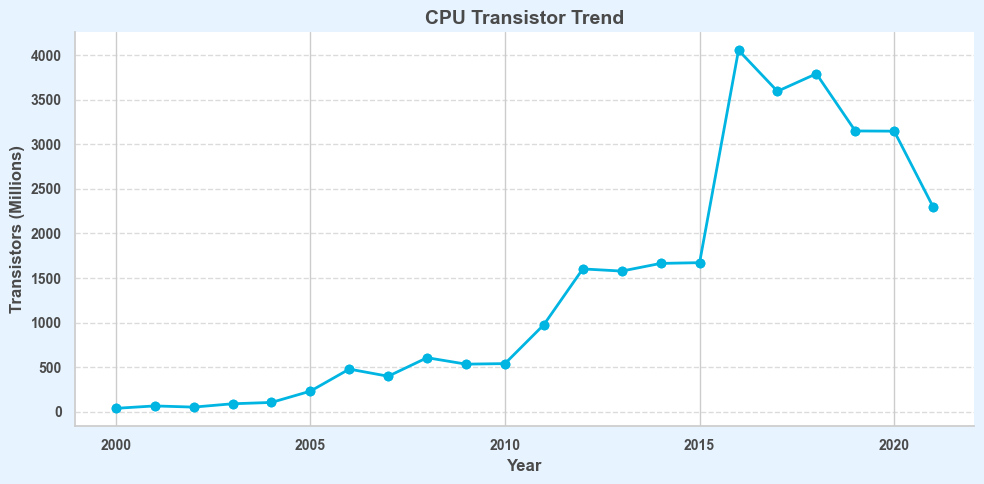

In [141]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Transistors'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('CPU Transistor Trend',
          fontsize=14,
          fontweight='bold',
          color='#4A4A4A')

plt.ylabel('Transistors (Millions)',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xlabel('Year',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Transistors'], color='#00B5E2', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **GPU & CPU Frequency Trend**


## GPU Frequency

In [126]:
df_ps = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [127]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [128]:
df_ps = df_ps.groupby('Year')['Frequency'].mean().reset_index()
df_ps

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


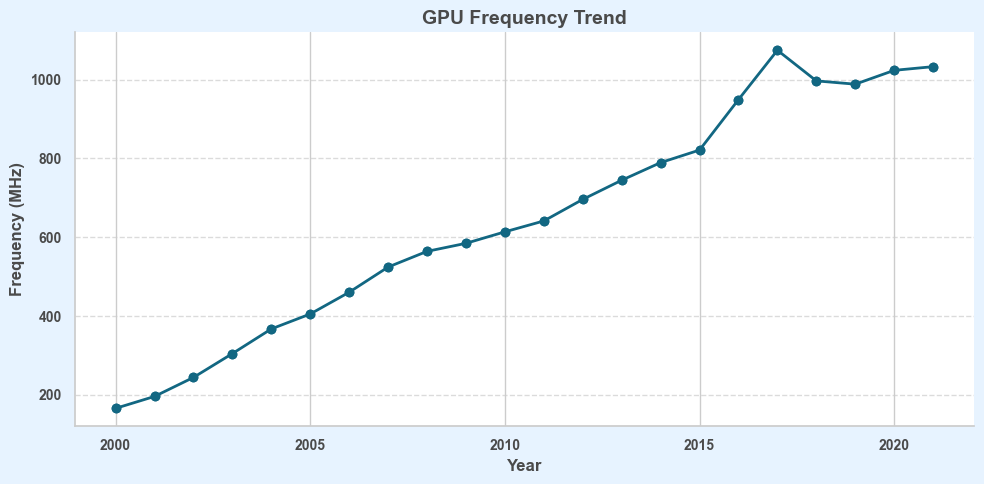

In [129]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Frequency'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('GPU Frequency Trend', fontsize=14, fontweight='bold', color='#4A4A4A')

plt.ylabel('Frequency (MHz)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Frequency'], color='#126782', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## CPU Frequency

In [130]:
df_ps = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [131]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [132]:
df_ps = df_ps.groupby('Year')['Frequency'].mean().reset_index()
df_ps

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


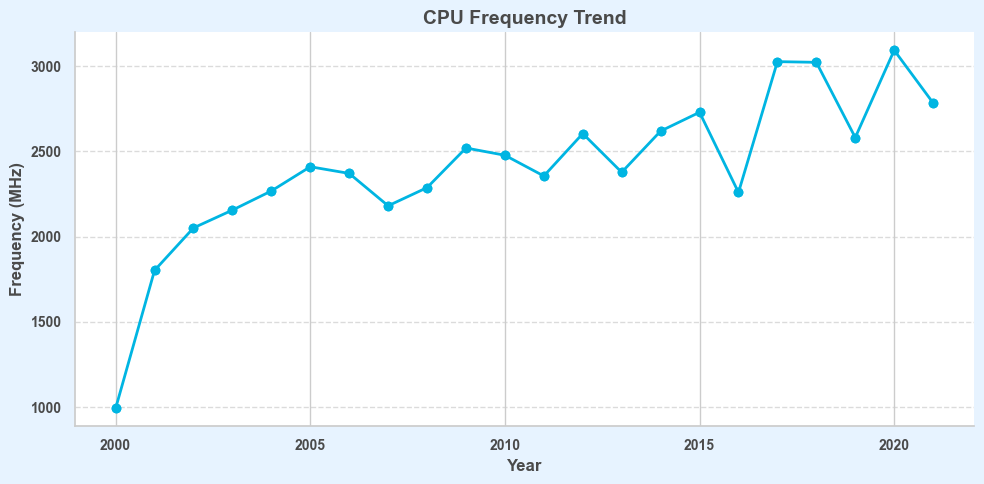

In [134]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(df_ps['Year'], df_ps['Frequency'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('CPU Frequency Trend',
          fontsize=14,
          fontweight='bold',
          color='#4A4A4A')

plt.ylabel('Frequency (MHz)',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xlabel('Year',
           fontsize=12,
           fontfamily='Arial',
           color='#4A4A4A',
           fontweight='bold')

plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(df_ps['Year'], df_ps['Frequency'], color='#00B5E2', zorder=5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

<hr style=\"border:2.5px solid #126782\">
</hr>

# **Summary of Dataset**

Summary of **Process size** for **CPU** and **GPU**

In [149]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Process_Size": [180.0, 137.79, 132.56, 130.0, 109.70, 92.95, 75.92, 70.86, 58.57, 45.91, 40.57, 33.46, 27.45, 25.00, 22.09, 16.50, 19.72, 15.41, 13.76, 11.36, 10.44, 10.92]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Process_Size": [189.64, 165.0, 153.91, 140.98, 121.38, 112.31, 93.17, 80.03, 63.43, 52.74, 42.78, 39.28, 33.65, 28.97, 27.79, 26.61, 22.09, 16.18, 13.82, 12.85, 10.0, 8.94]
})

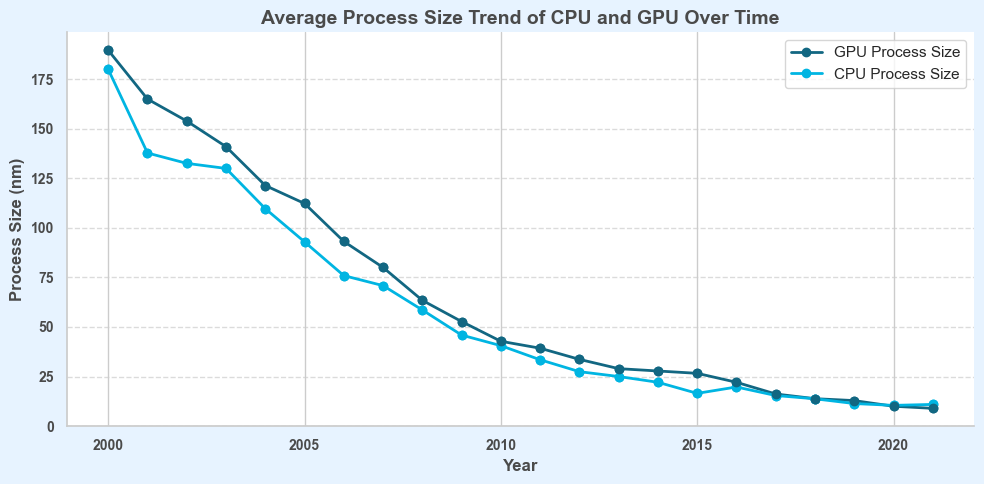

In [150]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')
plt.plot(gpu_ps['Year'], gpu_ps['Process_Size'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6, label='GPU Process Size')
plt.plot(cpu_ps['Year'], cpu_ps['Process_Size'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6, label='CPU Process Size')


plt.title('Average Process Size Trend of CPU and GPU Over Time', fontsize=14, fontweight='bold', color='#4A4A4A')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('Process Size (nm)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(cpu_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(cpu_ps['Year'], cpu_ps['Process_Size'], color='#00B5E2', zorder=5)
plt.scatter(gpu_ps['Year'], gpu_ps['Process_Size'], color='#126782', zorder=5)

plt.legend(loc='upper right', fontsize=10, prop={'family': 'Arial'}, facecolor='white')

plt.tight_layout()
plt.show()

Hypothesis of **Process Size Trend**

The process size of both CPUs and GPUs has steadily declined from 2000 to 2021, following a logarithmic trend with rapid minimalization in the early years and slower progress after 2015. Initially, GPUs had a slightly larger process size than CPUs, but over time, the gap narrowed as both technologies advanced. By 2010, CPUs reached 40.57 nm while GPUs were at 42.78 nm, showing a trend of convergence. Between 2010 and 2015, CPUs consistently led in reaching smaller process nodes earlier, but by 2020, GPUs had caught up and even surpassed CPUs in some instances, reaching 8.94 nm compared to the CPU’s 10.92 nm. This shift is likely due to the growing demand for GPUs in AI and high-performance computing. However, as both approached sub-10 nm nodes, progress slowed due to manufacturing limitations and diminishing returns. Moving forward, further shrinking beyond 3 nm to 5 nm may be challenging, leading to a focus on 3D stacking and chiplet designs rather than traditional node reductions. Thus, while CPUs historically led in process miniaturization, GPUs have caught up, and future advancements will likely prioritize efficiency and new architectures over just smaller nodes.
<hr style=\"border:2.5px solid #126782\">
</hr>


Summary of **TDP (Thermal Design Power)** for **CPU** and **GPU**

In [86]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "TDP": [50.47, 59.18, 68.48, 73.63, 78.25, 79.52, 72.82, 56.60, 63.58, 74.42, 62.03, 58.66, 64.70, 65.25, 57.37, 66.66, 123.59, 94.31, 81.06, 93.53, 72.65, 150.17]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "TDP": [55.25, 65.29, 75.41, 69.12, 68.90, 75.26, 63.03, 69.65, 95.53, 73.11, 70.52, 90.73, 77.17, 	94.64, 92.71, 89.33, 102.94, 102.26, 112.54, 90.46, 125.13,121.43]
})

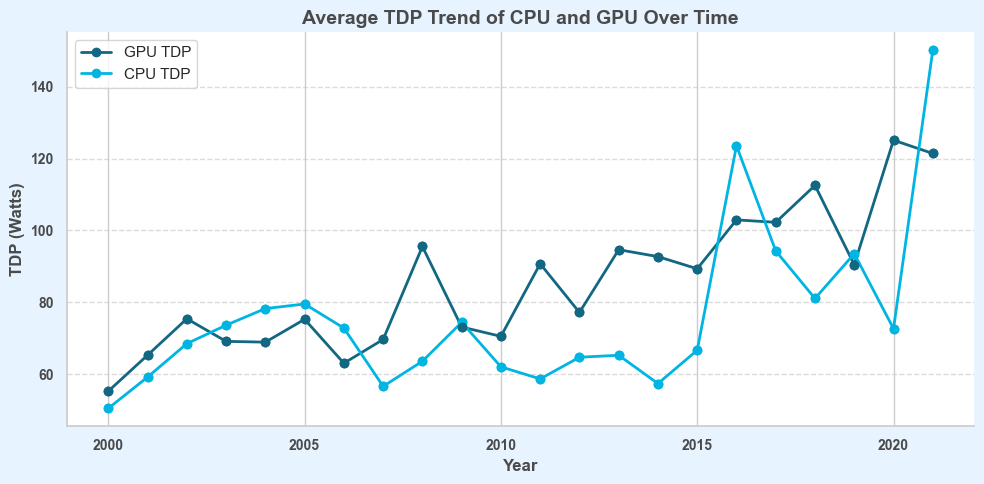

In [89]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')
plt.plot(gpu_ps['Year'], gpu_ps['TDP'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6, label='GPU TDP')
plt.plot(cpu_ps['Year'], cpu_ps['TDP'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6, label='CPU TDP')


plt.title('Average TDP Trend of CPU and GPU Over Time', fontsize=14, fontweight='bold', color='#4A4A4A')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('TDP (Watts)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(cpu_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(cpu_ps['Year'], cpu_ps['TDP'], color='#00B5E2', zorder=5)
plt.scatter(gpu_ps['Year'], gpu_ps['TDP'], color='#126782', zorder=5)

plt.legend(loc='upper left', fontsize=10, prop={'family': 'Arial'}, facecolor='white')

plt.tight_layout()
plt.show()

Hypothesis of **Thermal Design Power**

The thermal design power (TDP) of both CPUs and GPUs has shown an overall increasing trend from 2000 to 2021, with fluctuations at different points in time. Initially, GPUs had a slightly higher TDP than CPUs, with values of 55.25 watts and 50.47 watts, respectively, in 2000. From 2000 to 2010, both CPU and GPU TDPs experienced periodic spikes and drops, with GPUs peaking at 95.53 watts in 2008, while CPUs remained more stable, peaking at 79.52 watts in 2005. Between 2010 and 2015, CPU TDP remained relatively stable, fluctuating between 57 and 66 watts, whereas GPU TDP showed a gradual increase, reaching 94.64 watts in 2013. After 2015, a significant divergence occurred, with CPU TDP spiking to 123.59 watts in 2016 and reaching an all-time high of 150.17 watts in 2021. GPU TDP followed a steadier increase, peaking at 125.13 watts in 2020. The increasing TDP in CPUs and GPUs, despite process node reductions, suggests a shift toward higher power consumption for performance gains, particularly driven by multi-core architectures and increased computational demands. The sharp rise in CPU TDP in recent years may be due to high-performance processors requiring more power, while GPUs maintain a steadier but upward trend due to growing AI and gaming workloads. Moving forward, power efficiency and thermal management will become critical challenges in CPU and GPU design as power demands continue to rise.
<hr style=\"border:2.5px solid #126782\">
</hr>


Summary of **Die Size Trend** for **CPU** and **GPU**

In [22]:
cpu_df = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Die_Size": [129.05, 124.87, 130.64, 168.83, 148.85, 155.71, 172.47, 134.43, 163.50, 185.69, 159.01, 190.88, 196.74, 194.39, 195.96, 177.54, 179.34, 197.88, 184.74, 152.67, 170.25, 186.92]
})

gpu_df = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Die_Size": [106.84, 111.92, 114.64, 138.63, 176.30, 188.63, 175.21, 174.50, 197.31, 176.37, 182.84, 209.62, 184.56, 196.74, 189.66, 203.90, 229.76, 234.43, 320.95, 273.59, 324.74, 345.74]
})

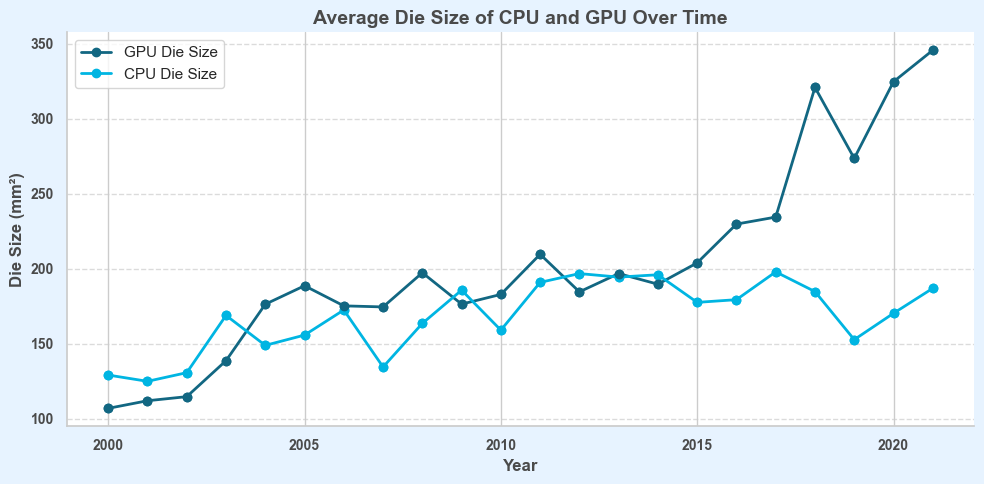

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')
plt.plot(gpu_df['Year'], gpu_df['Die_Size'], label='GPU Die Size', color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(cpu_df['Year'], cpu_df['Die_Size'], label='CPU Die Size', color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6)


plt.title('Average Die Size of CPU and GPU Over Time', fontsize=14, fontweight='bold', color='#4A4A4A')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('Die Size (mm²)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(cpu_df['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(cpu_df['Year'], cpu_df['Die_Size'], color='#00B5E2', zorder=5)
plt.scatter(gpu_df['Year'], gpu_df['Die_Size'], color='#126782', zorder=5)

plt.legend(loc='upper left', fontsize=10, prop={'family': 'Arial'}, facecolor='white')

plt.tight_layout()
plt.show()

Hypothesis of **Die size Trend**

The data from the CPU and GPU die sizes over the years show an increasing trend in both technologies. For CPUs, the die sizes varied between 124.87 mm² in 2001 and 197.88 mm² in 2017, with some fluctuations, but generally showing growth in size. GPUs have experienced a sharper increase, starting at 106.84 mm² in 2000 and reaching 345.74 mm² in 2021. The most notable growth in GPUs appears in the last decade, particularly after 2015. This could indicate an increasing demand for more complex and powerful GPUs to handle modern applications like gaming, AI, and machine learning. Recommendations for future product development could focus on optimizing die size to balance performance and power efficiency, as the larger die sizes tend to be associated with greater power consumption and heat generation. Furthermore, manufacturers should explore architectural innovations that allow performance gains without a proportional increase in die size.

<hr style=\"border:2.5px solid #126782\">
</hr>


Summary of **Transistors Trend** for **CPU** and **GPU**

In [7]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Transistors": [38, 65.2, 51.8, 89.3, 104.2, 230.6, 478.3, 398.0, 606.1, 533.9, 540.0, 976.6, 1602.2, 1577.8, 1664.0, 1672.3, 4055.3, 3594.9, 3791.7, 3149.9, 3147.6, 2297.7]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Transistors": [215.5, 119.6, 104.3, 139.7, 332.9, 294.7, 348.0, 388.8, 566.8, 613.8, 973.0, 1228.2, 1686.0, 2150.4, 2263.1, 2599.2, 4107.9, 5283.6, 7581.6, 6948.5, 12210.5, 14049.4]
})

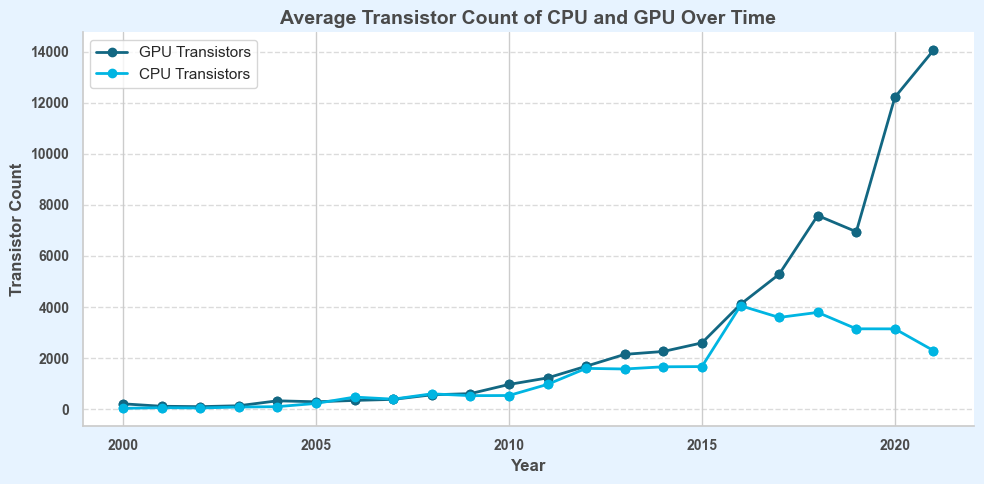

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')

plt.plot(gpu_ps['Year'], gpu_ps['Transistors'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6, label='GPU Transistors')
plt.plot(cpu_ps['Year'], cpu_ps['Transistors'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6, label='CPU Transistors')
plt.title('Average Transistor Count of CPU and GPU Over Time', fontsize=14, fontweight='bold', color='#4A4A4A')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.ylabel('Transistor Count', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')

plt.xticks(ticks=range(2000, int(cpu_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(gpu_ps['Year'], gpu_ps['Transistors'], color='#126782', zorder=5)
plt.scatter(cpu_ps['Year'], cpu_ps['Transistors'], color='#00B5E2', zorder=5)
plt.legend()
plt.tight_layout()
plt.show()

Hypothesis of **Transistors Trend**

The transistor count for both CPUs and GPUs has shown a significant upward trend from 2000 to 2021, reflecting advancements in semiconductor technology and increasing computational demands. In 2000, CPUs had a modest transistor count of 38 million, while GPUs started at 215.5 million. Over the next decade, both CPU and GPU transistor counts grew steadily, with CPUs reaching 540 million in 2010 and GPUs increasing to 973 million. A notable surge occurred between 2015 and 2020, where GPU transistor counts skyrocketed from 2,599.2 million in 2015 to 12,210.5 million in 2020, driven by advancements in parallel processing and AI workloads. Meanwhile, CPU transistor growth was more modest, peaking at 4,055.3 million in 2016 before experiencing a slight decline in recent years, settling at 2,297.7 million in 2021. The divergence in transistor growth between CPUs and GPUs highlights the industry's shift toward GPU acceleration for high-performance computing, deep learning, and gaming applications. With GPUs continuing to outpace CPUs in transistor density, future advancements will likely focus on optimizing architectures for power efficiency and performance scaling.
<hr style=\"border:2.5px solid #126782\">
</hr>


Summary of **Frequency** Trend for both **CPU** and **GPU**

In [213]:
df_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Frequency": [992.12, 1801.66, 2050.90, 2155.37, 2267.71, 2409.83, 2370.70, 2180.65, 2287.24, 2519.90, 2477.24, 2355.50, 2604.47, 2377.21, 2619.11, 2729.41, 2259.09, 3026.61, 3022.52, 2581.31, 3093.48, 2784.11]
})

df_cpu = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Frequency": [165.80, 196.06, 244.29, 304.80, 367.38, 405.27, 460.47, 524.36, 564.19, 584.58, 613.74, 641.36, 696.05, 744.69, 789.40, 821.25, 949.27, 1074.54, 996.77, 988.40, 1023.54, 1032.89]
})

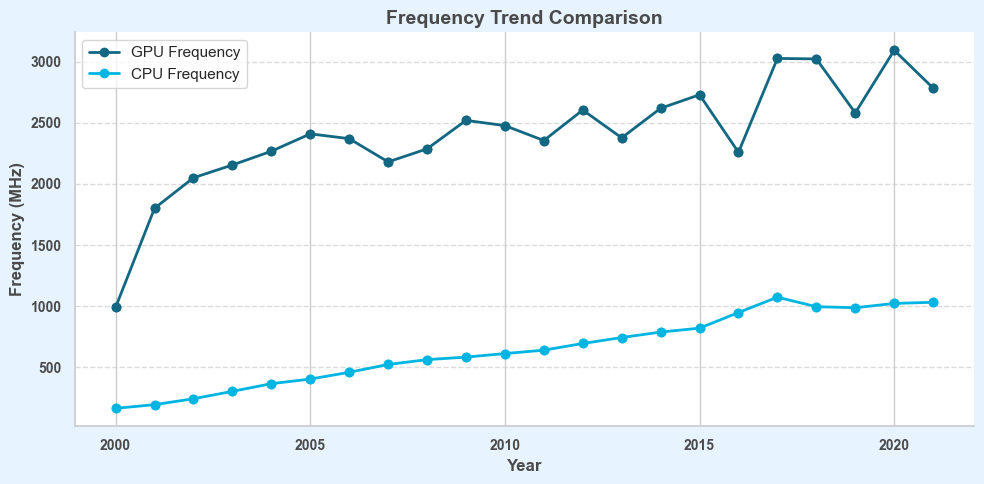

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5), facecolor='#E7F3FF')
plt.plot(df_ps['Year'], df_ps['Frequency'], color='#126782', marker='o', linestyle='-', linewidth=2, markersize=6, label='GPU Frequency')
plt.plot(df_cpu['Year'], df_cpu['Frequency'], color='#00B5E2', marker='o', linestyle='-', linewidth=2, markersize=6, label='CPU Frequency')
plt.title('Frequency Trend Comparison', fontsize=14, fontweight='bold', color='#4A4A4A')
plt.ylabel('Frequency (MHz)', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.xticks(ticks=range(2000, int(df_ps['Year'].max()) + 1, 5), fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.yticks(fontsize=10, fontfamily='Arial', color='#4A4A4A', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.scatter(df_ps['Year'], df_ps['Frequency'], color='#126782', zorder=5)
plt.scatter(df_cpu['Year'], df_cpu['Frequency'], color='#00B5E2', zorder=5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()

Hypothesis of **Frequency Trend**

The frequency trends of CPUs and GPUs from 2000 to 2021 show distinct growth patterns, reflecting advancements in processing technology. In 2000, CPU frequencies started at 165.80 MHz, while GPUs had a significantly higher frequency of 992.12 MHz. Over the next decade, both CPUs and GPUs experienced steady increases, with GPUs reaching 2,477.24 MHz in 2010 and CPUs rising to 613.74 MHz. However, while GPU frequencies continued to fluctuate, peaking at 3,093.48 MHz in 2020 before slightly decreasing to 2,784.11 MHz in 2021, CPU frequencies showed a slower but consistent increase, reaching 1,074.54 MHz in 2017 and stabilizing around 1,032.89 MHz in 2021. The higher frequency growth in GPUs highlights their role in parallel processing and graphics-intensive tasks, while CPUs have focused more on efficiency and multi-core architectures rather than purely increasing clock speeds.
<hr style=\"border:2.5px solid #126782\">
</hr>


# **Recommendations**

**Process Size**: As both CPUs and GPUs approach sub-10 nm nodes, progress in shrinking process size will slow down. Future efforts should focus on alternative approaches like 3D stacking and chiplet designs, rather than just miniaturizing process nodes. This shift will optimize performance while managing manufacturing limitations.

**Thermal Design Power (TDP)**: The significant rise in TDP, especially for CPUs, requires improved cooling solutions and power efficiency. Manufacturers should prioritize developing thermal management technologies to handle the increasing power demands without excessive heat generation, focusing on higher performance-per-watt efficiency.

**Die Size and Transistor Count**: Given the rapid increase in transistor count, especially in GPUs, optimizing architectures to enhance power efficiency while handling large-scale parallel processing is crucial. The shift towards GPUs highlights the need for software optimization to take full advantage of multi-threaded and GPU-accelerated computing.

**Transistor Count**: GPUs have seen exponential growth in transistor count, reflecting the industry's focus on parallel processing for AI, gaming, and high-performance computing. CPU transistor growth has slowed, so CPUs should concentrate on efficient multi-core scaling and integration of AI-driven optimizations.

**Frequency**: While CPU frequencies have stabilized, GPU frequencies continue to fluctuate, showing the importance of balancing clock speed with overall system efficiency. CPUs should emphasize multi-core performance and optimized software, whereas GPUs should continue to scale performance for AI, gaming, and high-performance computing workloads.



<hr style=\"border:2.5px solid #126782\">
</hr>

#  **Conclusion**


For high-performance tasks (e.g., gaming, AI, video editing, scientific computing), newer CPUs and GPUs are recommended due to their better efficiency, performance, and long-term viability.
For budget-conscious users or those with less demanding workloads, older CPUs and GPUs can still be a practical and cost-effective option.